In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data= pd.read_csv("/Users/abhisheksinha/Desktop/Sales.csv")
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [67]:
data.shape #To find out the number of rows & columns in the dataset
#113036-rows 18-columns

(113036, 18)

In [18]:
data.isnull().sum() #to check for null values
#No missing values in this dataset

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [9]:
data.dtypes #to check the data type of each variable

Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Age_Group                   object
Customer_Gender             object
Country                     object
State                       object
Product_Category            object
Sub_Category                object
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Cost                         int64
Revenue                      int64
dtype: object

In [20]:
data.info() #prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [5]:
#Converting datatype of variable date from object to datetime
data['Date']=pd.to_datetime(data['Date'])
#other option is while importing the data using pd.read_csv, 
#use pd.read_csv's parse_dates=['Date'/column name] parameter

In [22]:
data.describe() 
# .describe() method gives us summary statistics for numerical columns in our DataFrame

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [ ]:
data.describe(include='all') #to get the summary stats of the non numerical columns as well

In [23]:
#Gender wise composition of the bike customers
data['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x12318e9a0>,
 [Text(-0.054823682107296434, 1.0986329523003568, 'Male'),
  Text(0.05482368210729655, -1.0986329523003568, 'Female')],
 [Text(-0.02990382660397987, 0.5992543376183764, '51.59%'),
  Text(0.029903826603979933, -0.5992543376183764, '48.41%')])

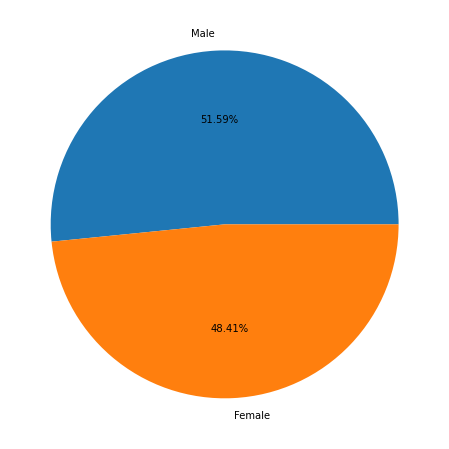

In [24]:
#Visualizing the gender wise composition of the bike customers
labels=['Male', 'Female']
plt.figure(figsize=(10,8))
plt.pie(data['Customer_Gender'].value_counts(),autopct='%.2f%%',labels=labels)

In [25]:
data["Age_Group"].value_counts() # to get counts of unique values of the column/array

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

([<matplotlib.patches.Wedge at 0x1231e04f0>,
 [Text(0.02121574346536912, 1.099795386528427, 'Adults(35-64)'),
  Text(-0.5608894225148137, -0.9462573940059855, 'Young Adults(25-34)'),
  Text(0.9456957531440837, -0.561835867923404, 'Youth(<25)'),
  Text(1.0997736109427714, -0.022316018325363646, 'Seniors(64+)')],
 [Text(0.011572223708383155, 0.5998883926518691, '49.39%'),
  Text(-0.3059396850080801, -0.5161403967305375, '34.20%'),
  Text(0.5158340471695001, -0.3064559279582203, '15.77%'),
  Text(0.5998765150596934, -0.012172373632016533, '0.65%')])

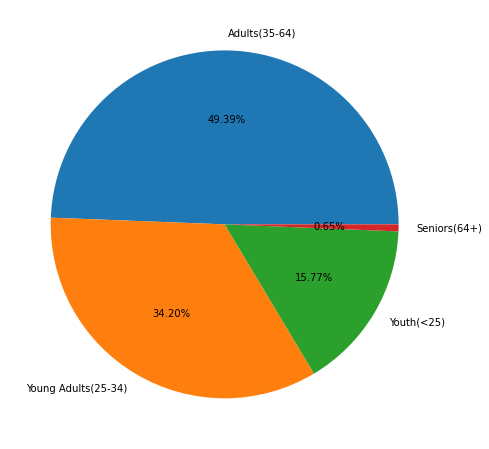

In [26]:
labels=['Adults(35-64)','Young Adults(25-34)','Youth(<25)','Seniors(64+)']
plt.figure(figsize=(10,8))
plt.pie(data['Age_Group'].value_counts(),autopct='%.2f%%',labels=labels)

In [27]:
data["Age_Group"].unique() #to find the unique elements of the given column/array

array(['Youth (<25)', 'Adults (35-64)', 'Young Adults (25-34)',
       'Seniors (64+)'], dtype=object)

In [28]:
data.drop(["Age_Group"],axis=1, inplace=True) #dropping a column from the dataframe
#data.head()

In [29]:
#creating age groups by pd.cut
data["Age_Group"]=pd.cut(data["Customer_Age"], bins=[17,25,34,64,87],labels=['Youth(<25)','Young Adults(25-34)','Adults(35-64)','Seniors(64+)'])
data.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Age_Group
0,2013-11-26,26,November,2013,19,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,Youth(<25)
1,2015-11-26,26,November,2015,19,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,Youth(<25)
2,2014-03-23,23,March,2014,49,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,Adults(35-64)
3,2016-03-23,23,March,2016,49,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,Adults(35-64)
4,2014-05-15,15,May,2014,47,F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,Adults(35-64)


In [31]:
#Changing the order of the columns
data=data[['Date', 'Day', 'Month', 'Year', 'Customer_Age','Age_Group','Customer_Gender',
       'Country', 'State', 'Product_Category', 'Sub_Category', 'Product',
       'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost',
       'Revenue']]
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth(<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth(<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults(35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults(35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults(35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [32]:
#Calculating average revenue for the different customer's gender and age groups
g=data.groupby(['Customer_Gender', "Age_Group"])['Revenue'].mean()
g

Customer_Gender  Age_Group          
F                Youth(<25)             686.587483
                 Young Adults(25-34)    807.699208
                 Adults(35-64)          773.423600
                 Seniors(64+)           389.371257
M                Youth(<25)             694.946483
                 Young Adults(25-34)    772.934067
                 Adults(35-64)          752.542155
                 Seniors(64+)           449.474747
Name: Revenue, dtype: float64

In [34]:
#Calculating total revenue for the each country and states
cs=data.groupby(['Country','State'])['Revenue'].sum()
cs.head()

Country    State          
Australia  New South Wales    9203495
           Queensland         5066267
           South Australia    1397274
           Tasmania            580184
           Victoria           5054839
Name: Revenue, dtype: int64

In [37]:
#group by doesn't give the subtotals for each country so, using pivot table to calculate that
#1st step-Create the pivot table by using both country & state as the index & revenue as the values

ct=data.pivot_table(values=['Revenue'], index=['Country','State'],aggfunc=np.sum,margins=True,
               margins_name='Total')
ct.head()

Revenue
Country   State                   
Australia New South Wales  9203495
          Queensland       5066267
          South Australia  1397274
          Tasmania          580184
          Victoria         5054839

In [38]:
#2nd step-Create the pivot table by using country as the index & revenue as the values

t=data.pivot_table(values=['Revenue'], index=['Country'],aggfunc=np.sum,margins=True,
               margins_name='Total')
#3rd step-create MultiIndex.from_arrays for pivot table t
t.index = pd.MultiIndex.from_arrays([t.index + '_total', len(t.index) * ['']])
print(t)

                        Revenue
Country                        
Australia_total        21302059
Canada_total            7935738
France_total            8432872
Germany_total           8978596
United Kingdom_total   10646196
United States_total    27975547
Total_total            85271008


In [39]:
#4th step-concat pivot table t to ct & then sort index
pd.set_option('display.max_rows', None) 
pd.concat([ct, t]).sort_index()
                       

Revenue
Country              State                        
Australia            New South Wales       9203495
                     Queensland            5066267
                     South Australia       1397274
                     Tasmania               580184
                     Victoria              5054839
Australia_total                           21302059
Canada               Alberta                 56803
                     British Columbia      7877890
                     Ontario                  1045
Canada_total                               7935738
France               Charente-Maritime      106047
                     Essonne                973532
                     Garonne (Haute)        183906
                     Hauts de Seine         937140
                     Loir et Cher            82533
                     Loiret                 325172
                     Moselle                266223
                     Nord                  1324652
                     Pas de Calais           50413
                     Seine (Paris)         1643279
                     Seine Saint Denis     1131634
                     Seine et Marne         373285
                     Somme                  102179
                     Val d'Oise             148295
                     Val de Marne            93446
                     Yveline                691136
France_total                               8432872
Germany              Bayern                1341985
                     Brandenburg            169770
                     Hamburg               1559005
                     Hessen                2073391
                     Nordrhein-Westfalen   1804900
                     Saarland              2029545
Germany_total                              8978596
Total                                     85271008
Total_total                               85271008
United Kingdom       England              10646196
United Kingdom_total                      10646196
United States        Alabama                   210
                     Arizona                  9379
                     California           17672620
                     Florida                 11014
                     Georgia                  4862
                     Illinois                20141
                     Kentucky                 3756
                     Massachusetts            4084
                     Minnesota                1466
                     Mississippi              1684
                     Missouri                 1739
                     Montana                  2005
                     New York                 5257
                     North Carolina            405
                     Ohio                     9747
                     Oregon                3450410
                     South Carolina           1241
                     Texas                    6835
                     Utah                     4037
                     Virginia                 1172
                     Washington            6741510
                     Wyoming                 21973
United States_total                       27975547

In [40]:
data.rename(columns={'Age_Group':'Age_group'}, inplace=True) #renaming a column
data.head()

,Date,Day,Month,Year,Customer_Age,Age_group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth(<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth(<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults(35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults(35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults(35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [41]:
#Get all the sales made in the state of North Carolina
data.loc[data['State']=='North Carolina'].head()


,Date,Day,Month,Year,Customer_Age,Age_group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
7684,2013-08-15,15,August,2013,37,Adults(35-64),F,United States,North Carolina,Accessories,Bottles and Cages,Mountain Bottle Cage,16,4,10,75,64,139
7685,2015-08-15,15,August,2015,37,Adults(35-64),F,United States,North Carolina,Accessories,Bottles and Cages,Mountain Bottle Cage,14,4,10,66,56,122
88964,2013-08-15,15,August,2013,37,Adults(35-64),F,United States,North Carolina,Accessories,Tires and Tubes,Mountain Tire Tube,17,2,5,40,34,74
88965,2015-08-15,15,August,2015,37,Adults(35-64),F,United States,North Carolina,Accessories,Tires and Tubes,Mountain Tire Tube,16,2,5,38,32,70


In [43]:
#Calculating the mean revenue for the state of North Carolina in the year of 2013
data.loc[(data['State']=='North Carolina') & (data['Year']==2013), 'Revenue'].mean()

106.5

In [44]:
data.loc[(data['Country']=='France') | (data['Country']=='Germany')].head()

,Date,Day,Month,Year,Customer_Age,Age_group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
48,2013-08-07,7,August,2013,38,Adults(35-64),M,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,3,45,120,160,135,295
49,2015-08-07,7,August,2015,38,Adults(35-64),M,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,53,45,98
50,2013-07-15,15,July,2013,52,Adults(35-64),F,France,Seine Saint Denis,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,427,360,787
51,2015-07-15,15,July,2015,52,Adults(35-64),F,France,Seine Saint Denis,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,427,360,787
52,2013-08-17,17,August,2013,43,Adults(35-64),F,France,Moselle,Accessories,Bike Racks,Hitch Rack - 4-Bike,28,45,120,1697,1260,2957


In [ ]:
data.columns.values #to get the names of all the columns

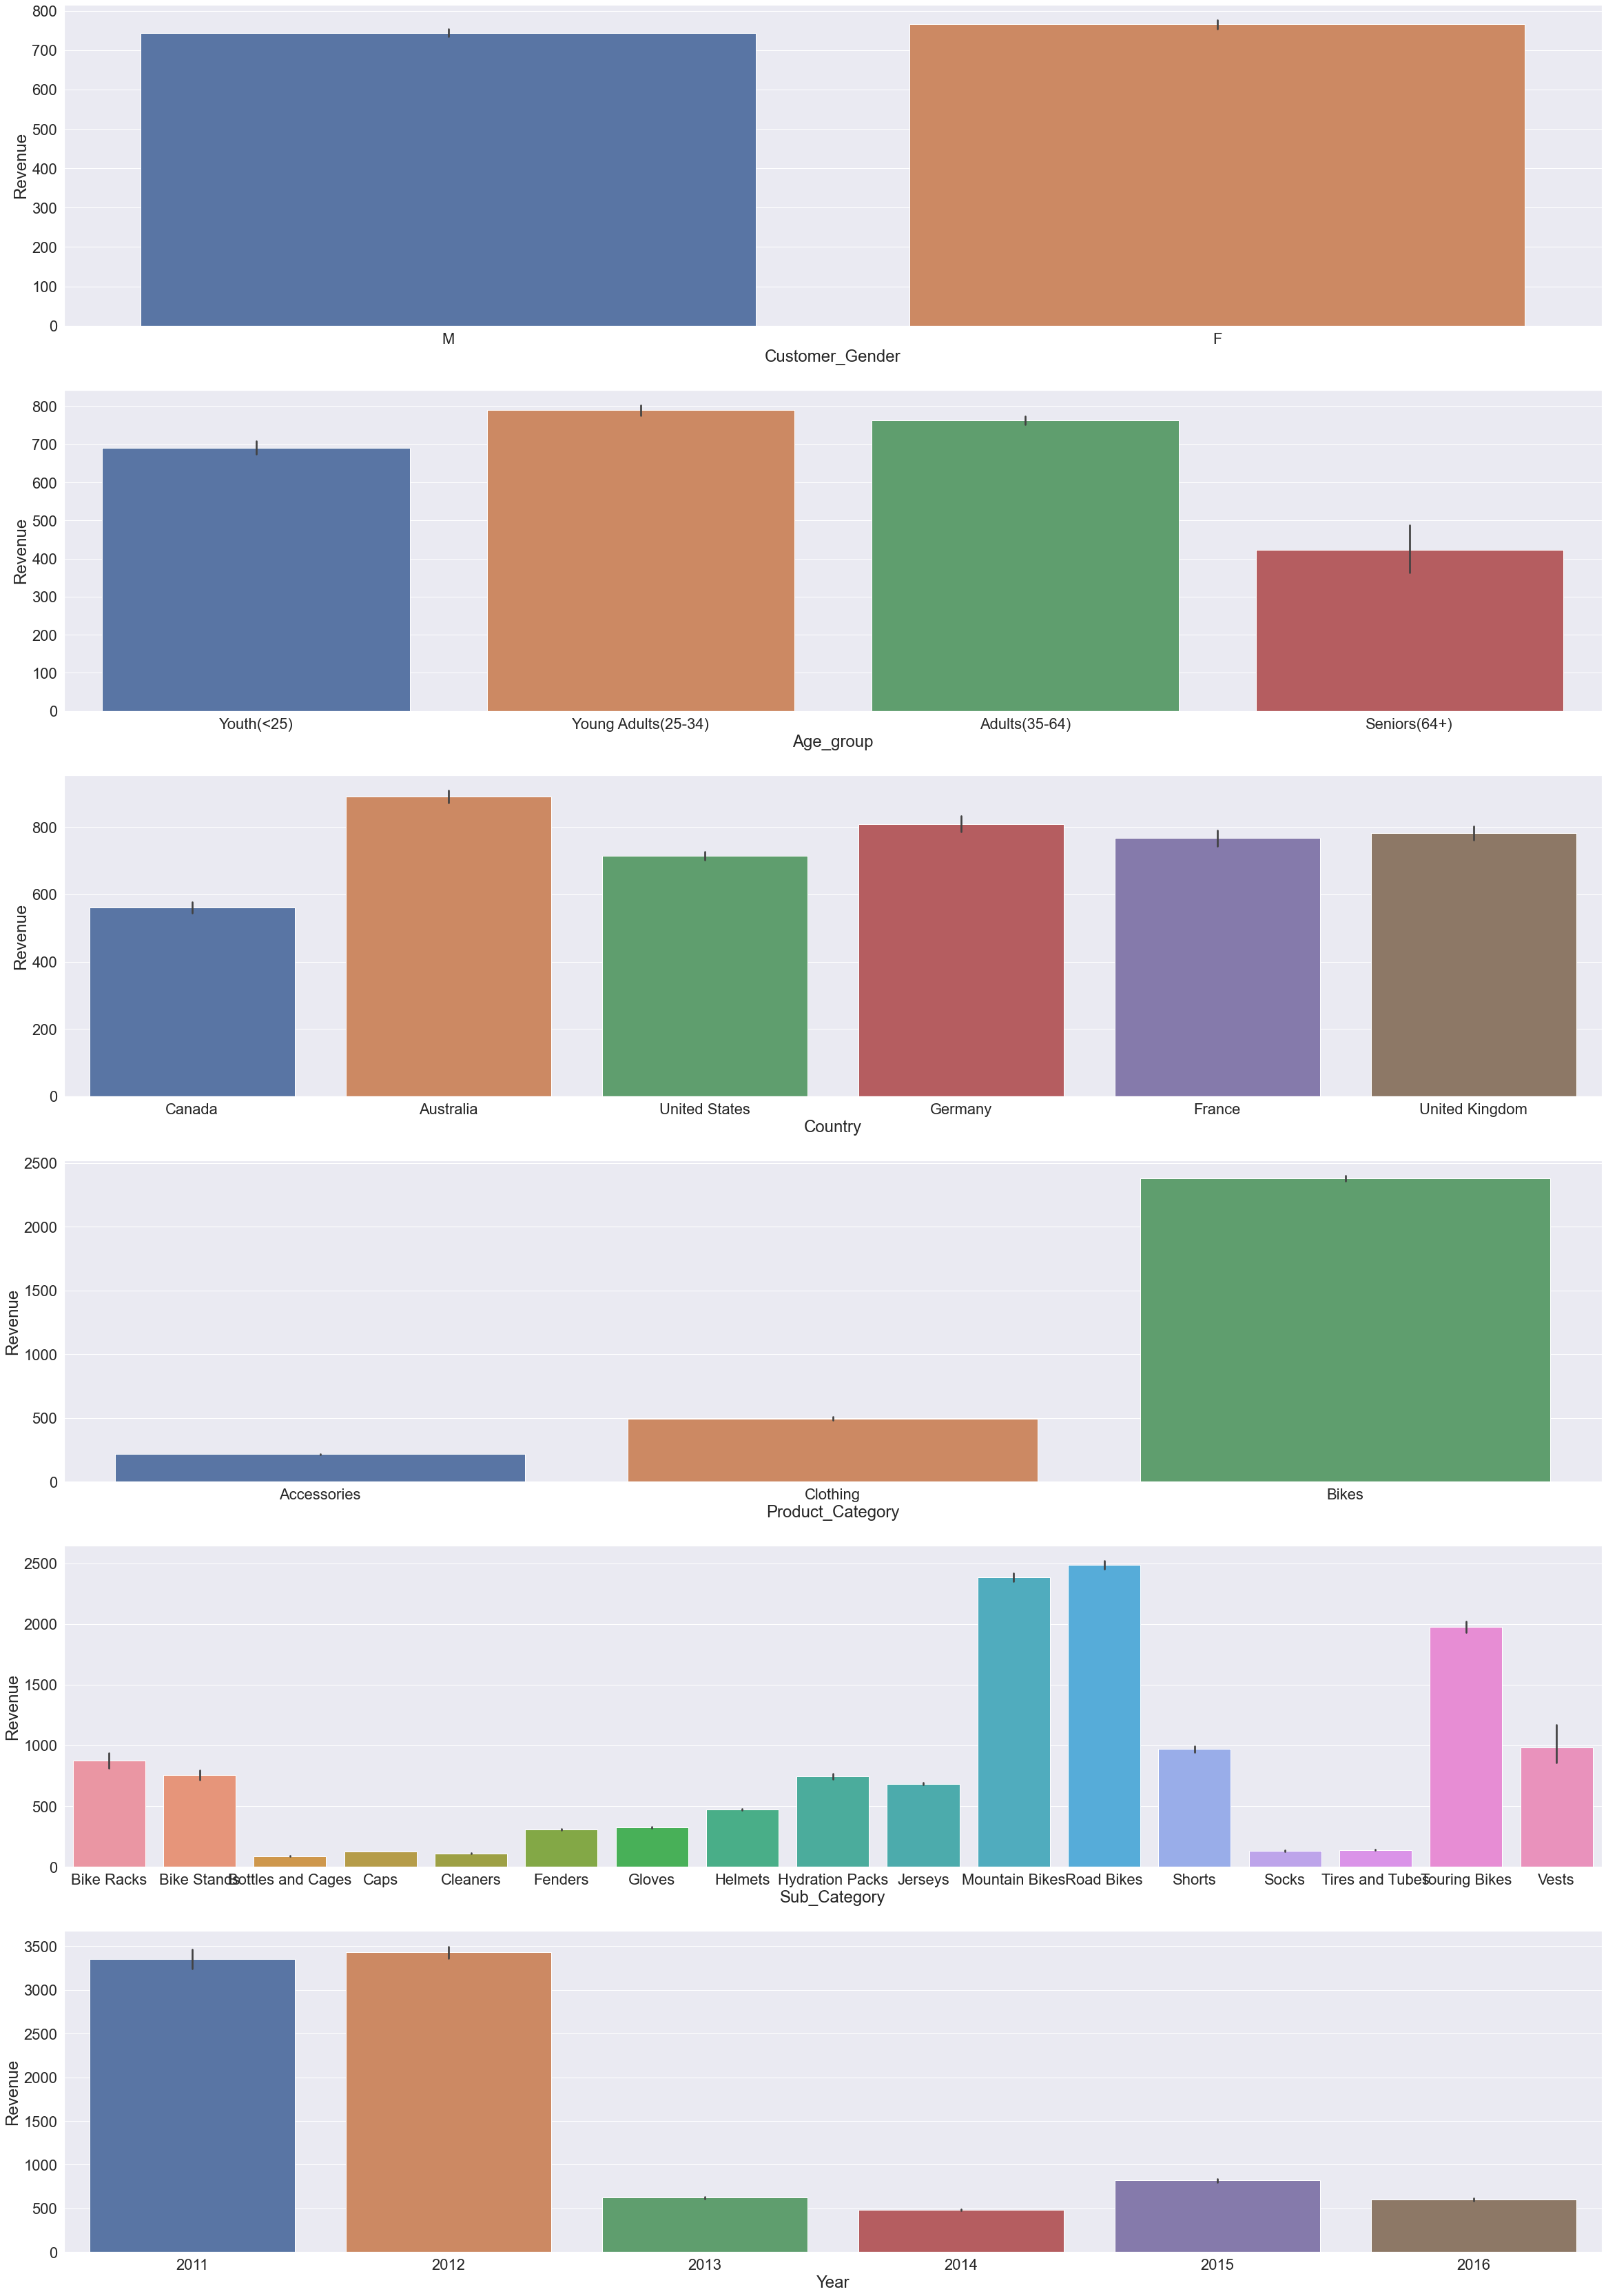

In [47]:
#Visualizing the amount of revenue generated by different gender groups, age groups, countries, product categories, sub categories and years 

sns.set(font_scale = 2)
features=data[['Customer_Gender','Age_group','Country','Product_Category','Sub_Category','Year']]
y=data['Revenue']
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(40,60))
for col,ax in zip(features,axes.flatten()):
    sns.barplot(x=col,y=y,data=data,ax=ax)
   
  

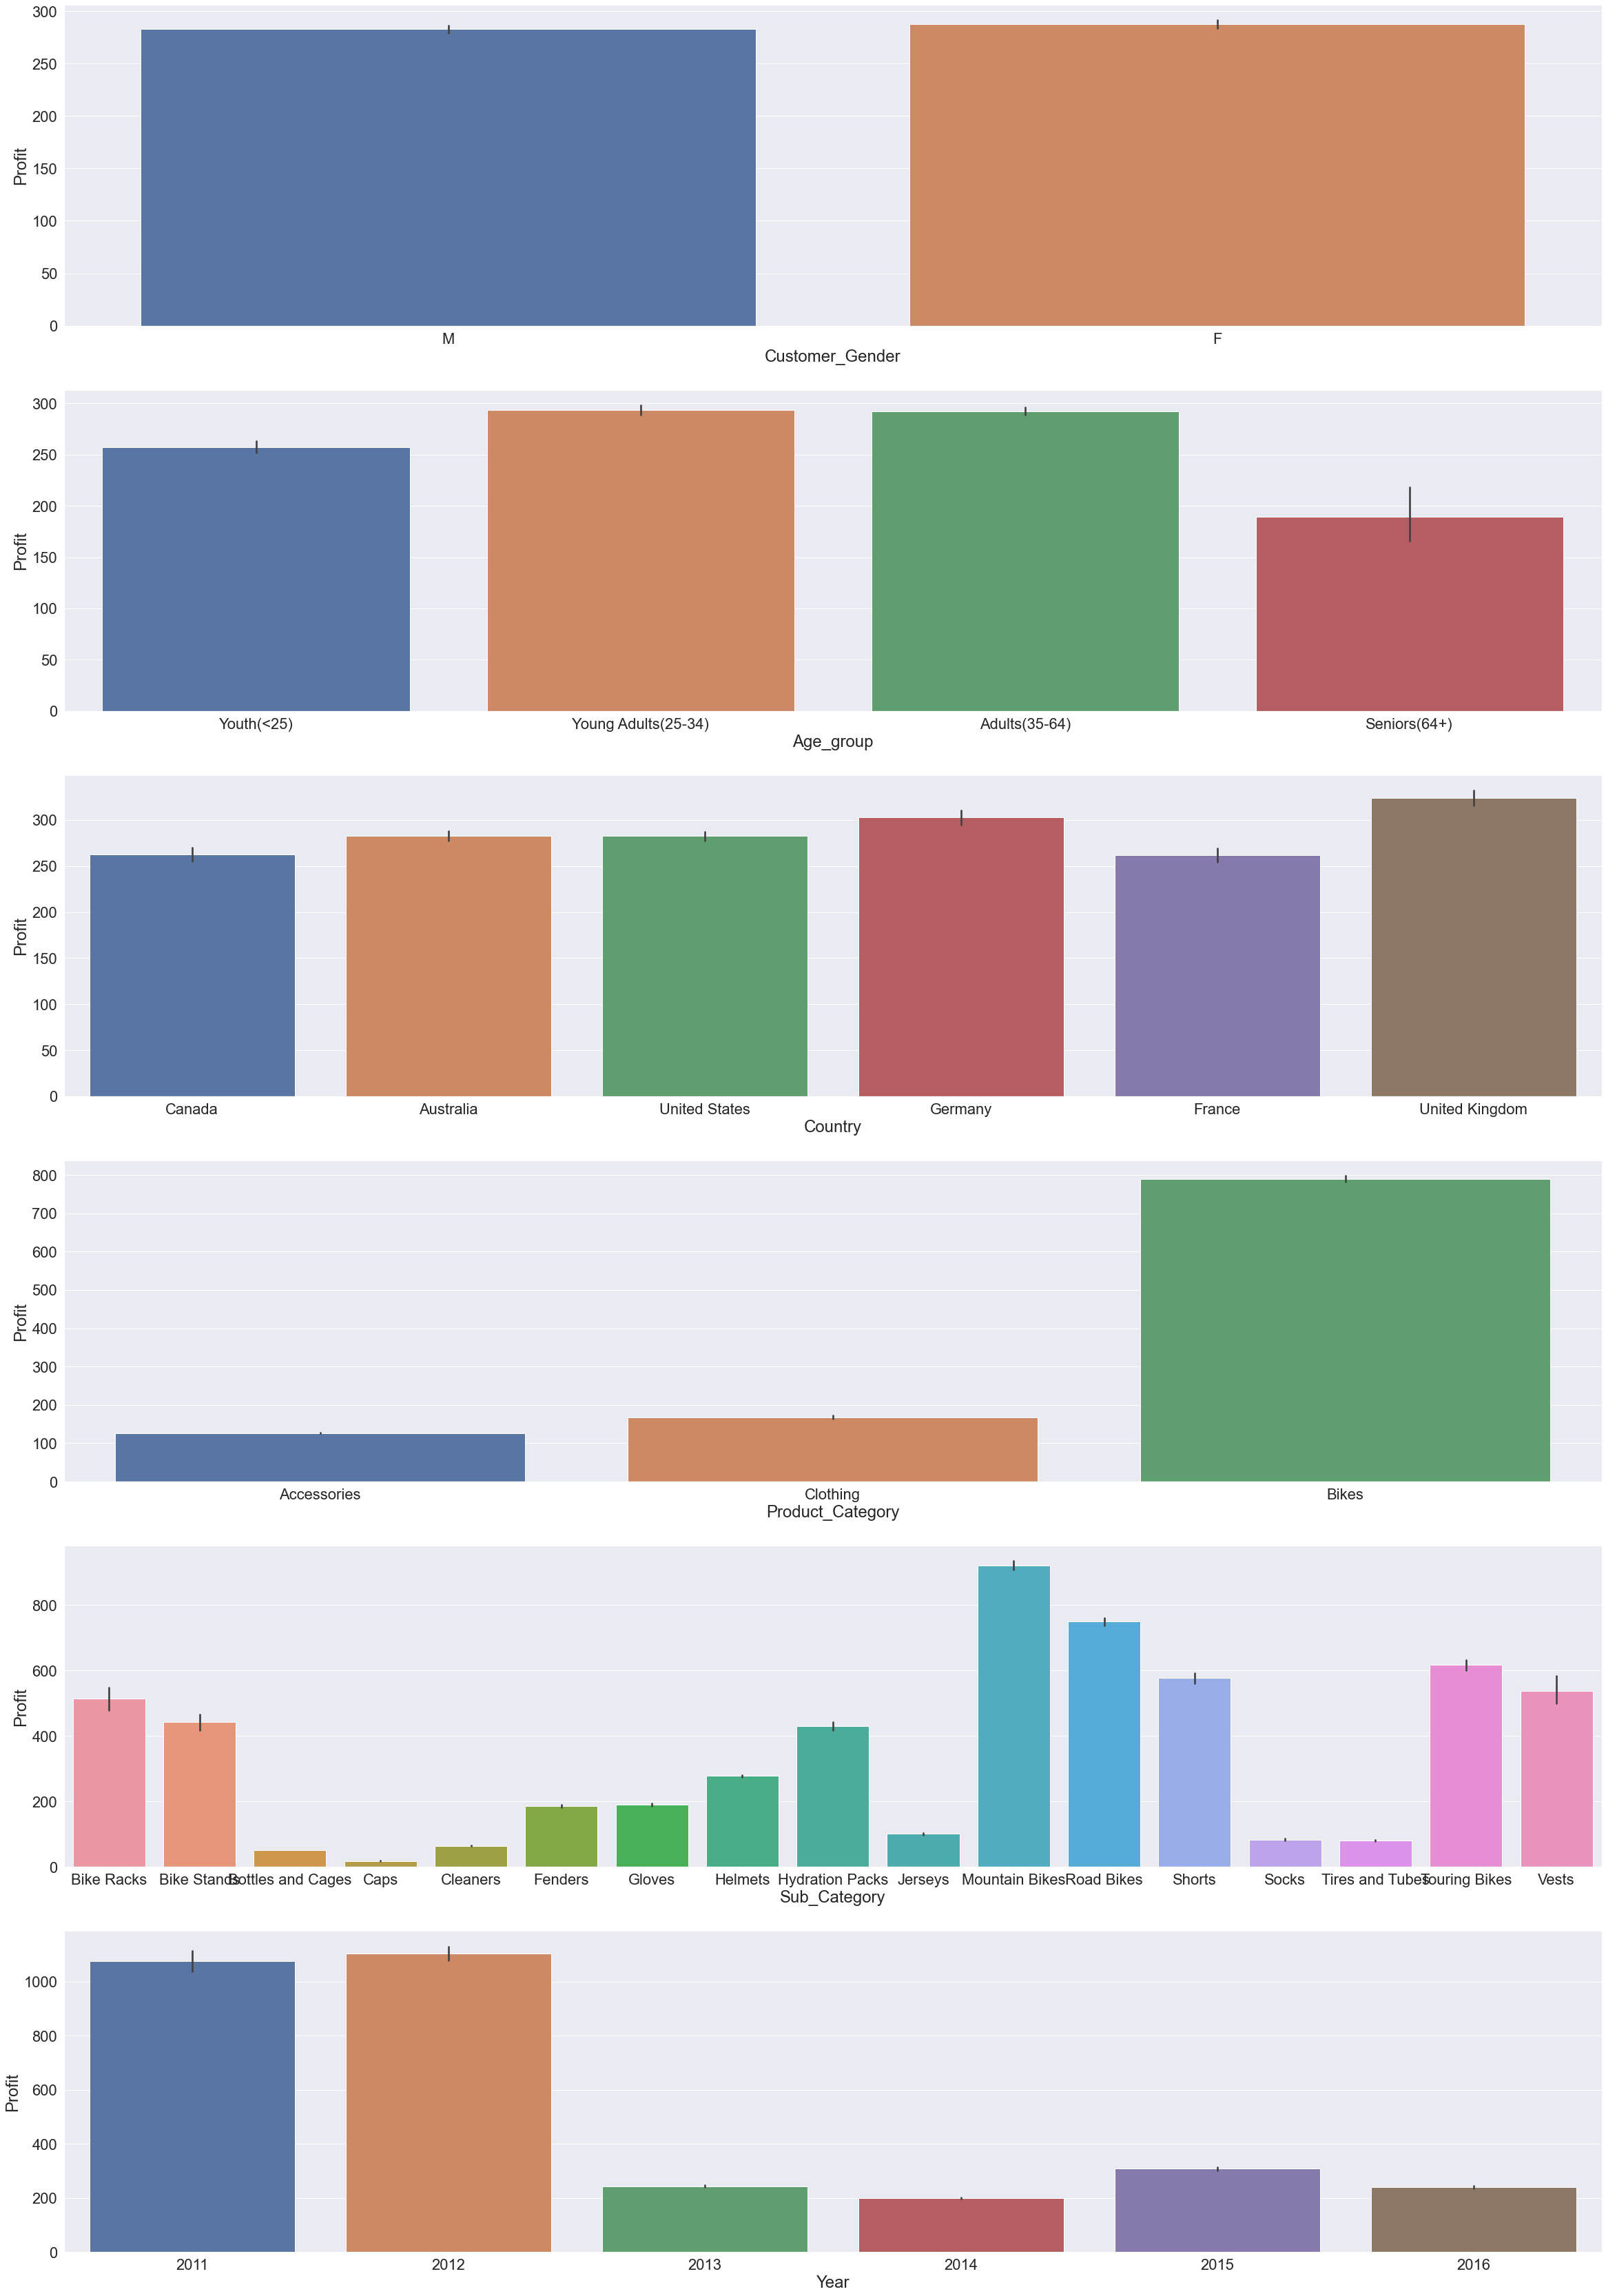

In [48]:
#Visualizing the amount of profit generated by different gender groups, age groups, countries, product categories, sub categories and years 
sns.set(font_scale = 2)
features=data[['Customer_Gender','Age_group','Country','Product_Category','Sub_Category','Year']]
y=data['Profit']
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(40,60))
for col,ax in zip(features,axes.flatten()):
    sns.barplot(x=col,y=y,data=data,ax=ax)

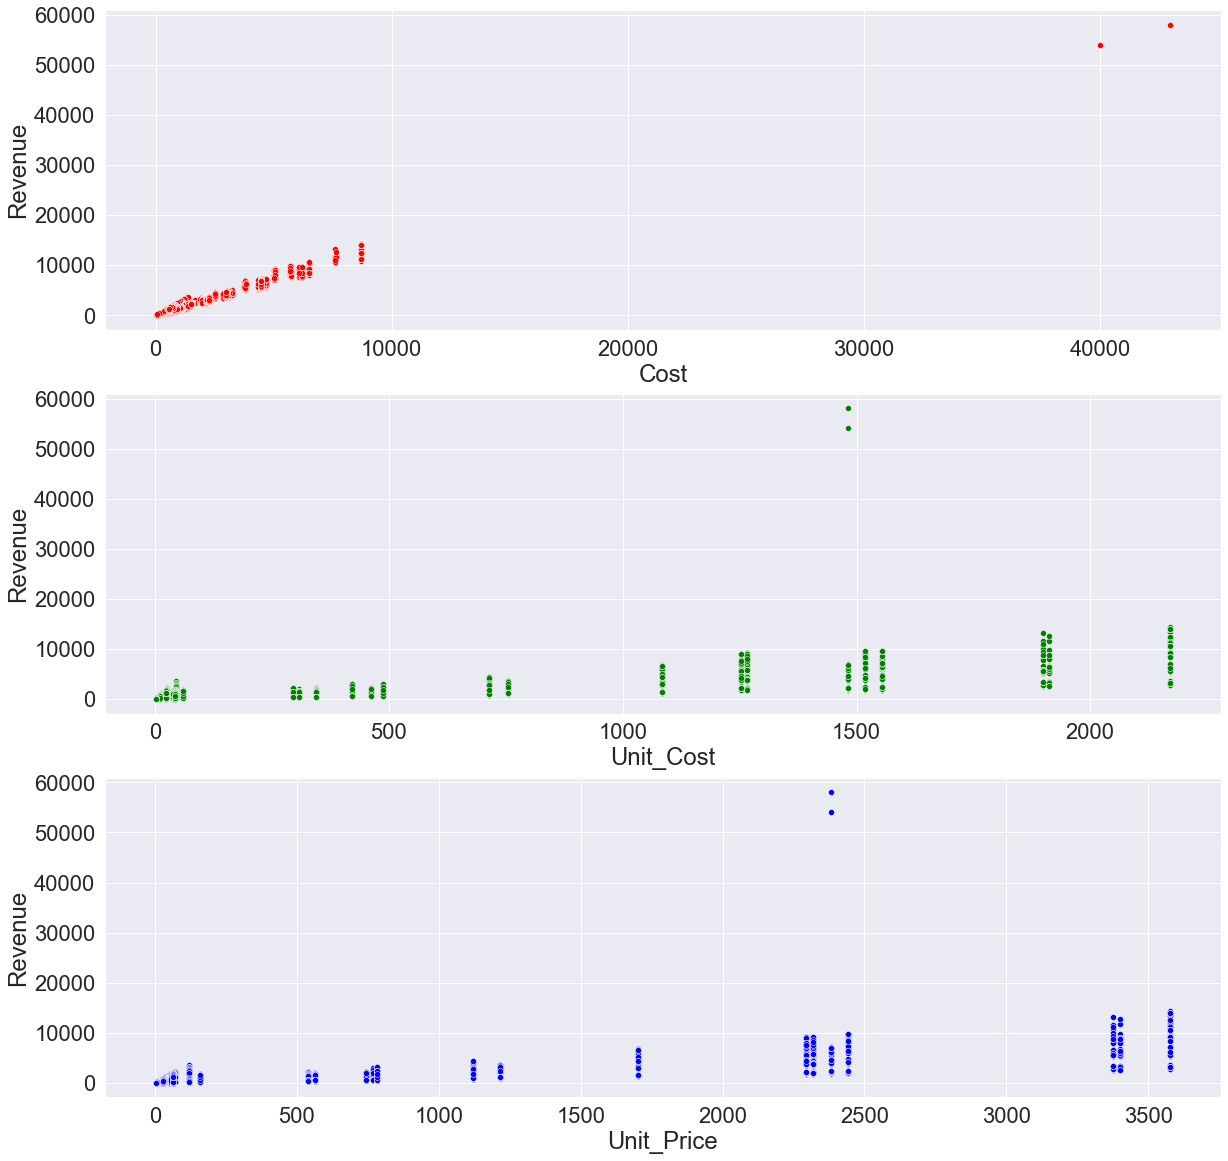

In [49]:
#Creating scatterplots to visulaize the relationship between revenue and other variables like cost, unit_cost and unit_price
features = data[["Cost","Unit_Cost","Unit_Price"]]
y=data['Revenue']
color=['red','green','blue']
fig,axes=plt.subplots(3, 1, figsize=(20,20))
for col,ax,c in zip(features, axes.flatten(),color):
    sns.scatterplot(x=col,y=y,data=data, ax=ax,color=c)

In [50]:
#Calculating correlation between revenue and other numerical variables
#It can be seen that the revenue has strong  positive relationship with cost, profit,unit_price & unit_cost
corr=data.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


<AxesSubplot:>

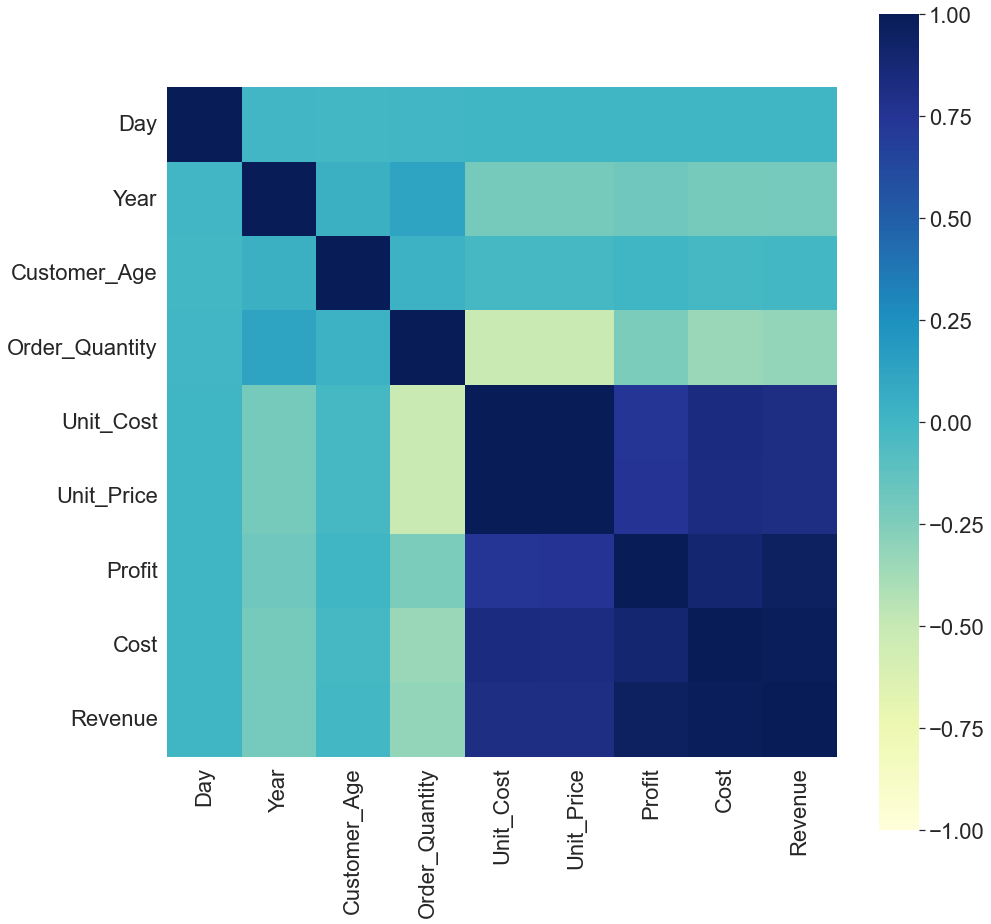

In [51]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmin=-1, vmax=1, center=0,
    cmap="YlGnBu",
    square=True)

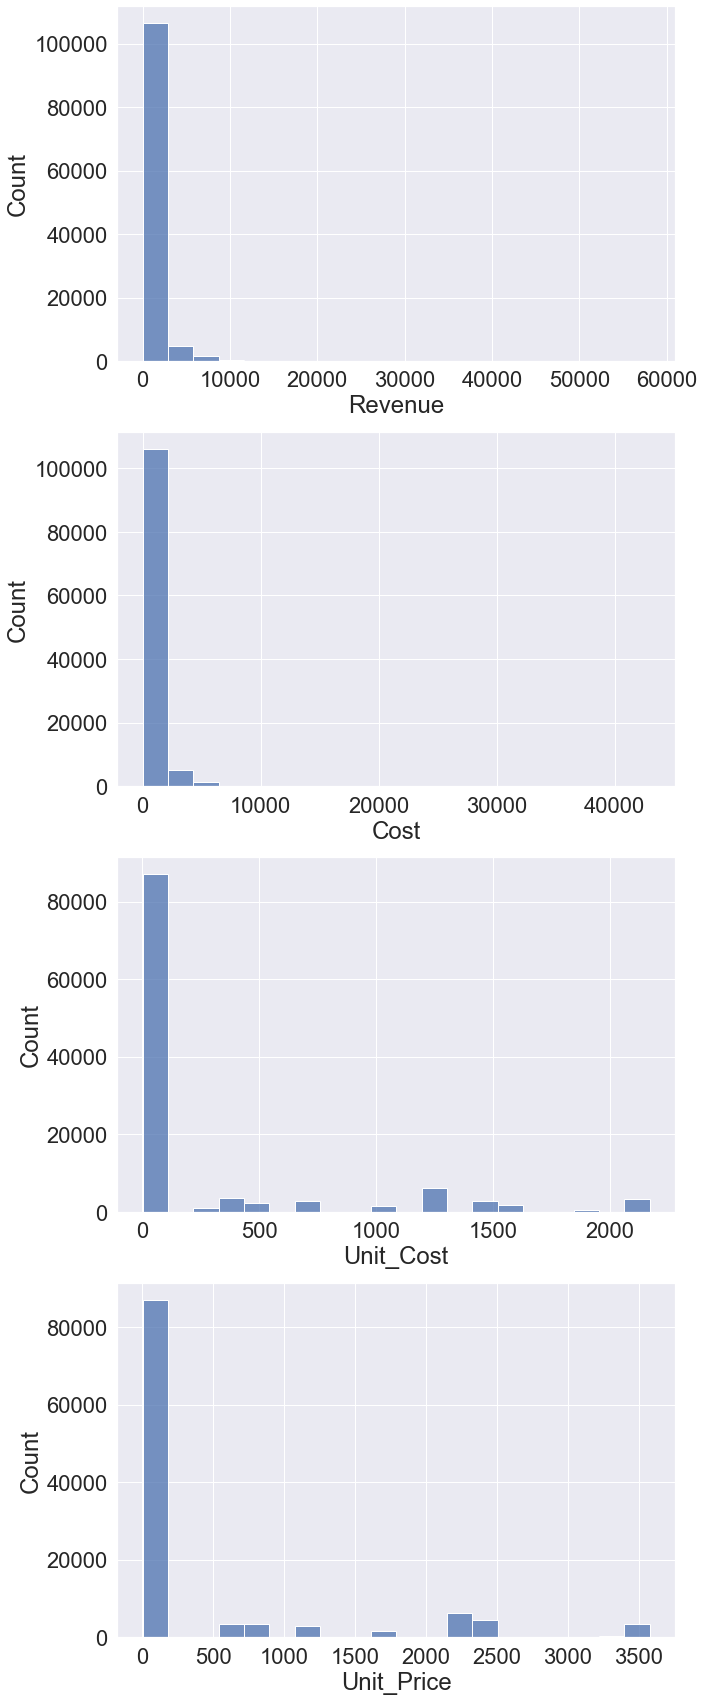

In [68]:
#Visualizing the distribution of "Revenue","Cost","Unit_Cost"and "Unit_Price"
features = data[["Revenue","Cost","Unit_Cost","Unit_Price"]]
fig,axes=plt.subplots(4, 1, figsize=(10,30))
for col,ax in zip(features, axes.flatten()):
    sns.histplot(x=features[col],ax=ax,bins=20)